#### Importing Libraries 

In [1]:
import os
import csv
import pandas as pd
import datetime as dt
import numpy as np

# Data Preprocessing

#### Loading and Reading the Dataset

In [2]:
def num_of_rows(file_path):
    file = open(file_path)
    reader = csv.reader(file)
    i= len(list(reader))
    return i

In [3]:
def read_file(file_path, numberOfRows):
    indexCounter = 0
    indexCounter = 0
    with open(file_path,'r') as file:
        nRows = numberOfRows
        nColumns = 4
        dataset = np.zeros(shape=(nRows, nColumns))
        arrivalTimes = []
        for line in file:
            try:
                dataInstance = line.split(',')
                dataInstance[1] = dataInstance[1].replace('"','')
                dataInstance[2] = dataInstance[2].replace('"','')
                dataInstance[3] = dataInstance[3].replace('"','')
                arrivalTime = dataInstance[1] #splits the line at the comma and takes the first bit
                arrivalTime = arrivalTime[:arrivalTime.index(':')+3]
                arrivalTime = dt.datetime.strptime(arrivalTime, '%H:%M')
                arrivalHour = arrivalTime.hour
                arrivalMinute = arrivalTime.minute
                waitingMinutes = dataInstance[2]
                serviceMinutes = dataInstance[3]

                arrivalTimes.append(arrivalTime)
                dataset[indexCounter] = [arrivalHour, arrivalMinute, waitingMinutes, serviceMinutes]
                indexCounter = indexCounter + 1
            except:
                #print('index' + str(indexCounter) + 'error')
                pass
    return dataset, arrivalTimes

In [4]:
filenames = []
rootFilePath = './BankDataCsv/'
fullDataset = pd.DataFrame()

for bankCounter in range(3):
    for dayCounter in range(5):
            filename = 'Bank' + str(bankCounter + 1) + 'Day' + str(dayCounter + 1)
            fullPath = rootFilePath + filename + '.csv'
            filenames.append(fullPath)
            
            numberOfRows = num_of_rows(fullPath) - 1
            print('Reading ' + str(filename) + ' that contains ' + str(numberOfRows) + ' entries')
            tempFeatures, tempArrivalTimes = read_file(rootFilePath + filename + '.csv', numberOfRows)
            dfTempFeatures = pd.DataFrame(np.array(tempFeatures), columns=['hour', 'minutes', 'waitingTime', 'serviceTime'])
            dfTempArrivalTimes = pd.DataFrame(np.array(tempArrivalTimes), columns=['arrivalTime'])
            
            timeLeavingTheQueue = []
            for arrivalTimeCounter in range(numberOfRows):
                timeLeavingTheQueue.append(dfTempArrivalTimes.at[arrivalTimeCounter, 'arrivalTime'] + pd.Timedelta(minutes = dfTempFeatures.at[arrivalTimeCounter, 'waitingTime']))
            dftimeLeavingTheQueue = pd.DataFrame(np.array(timeLeavingTheQueue), columns=['timeLeavingTheQueue'])

            waitingPeople = np.zeros(numberOfRows)
            for i in range(numberOfRows):
                for j in range(i):
                    if (dfTempArrivalTimes.at[i, 'arrivalTime'] < dftimeLeavingTheQueue.at[j, 'timeLeavingTheQueue']):
                        waitingPeople[i] += 1
            dfWaitingPeople = pd.DataFrame(np.array(waitingPeople), columns=['waitingPeople'])
            
            dfWaitingPeople['waitingPeople'] = dfWaitingPeople['waitingPeople'].astype(int)
            dfTempFeatures['hour'] = dfTempFeatures['hour'].astype(int)
            dfTempFeatures['minutes'] = dfTempFeatures['minutes'].astype(int)
    
            tempDataset = pd.concat([dfTempFeatures, dfWaitingPeople], axis=1)
        
            fullDataset = pd.concat([fullDataset, tempDataset], axis=0)
          
fullDataset = fullDataset.reset_index(drop = True)

Reading Bank1Day1 that contains 857 entries
Reading Bank1Day2 that contains 981 entries
Reading Bank1Day3 that contains 1057 entries
Reading Bank1Day4 that contains 899 entries
Reading Bank1Day5 that contains 996 entries
Reading Bank2Day1 that contains 1034 entries
Reading Bank2Day2 that contains 1009 entries
Reading Bank2Day3 that contains 891 entries
Reading Bank2Day4 that contains 948 entries
Reading Bank2Day5 that contains 890 entries
Reading Bank3Day1 that contains 988 entries
Reading Bank3Day2 that contains 784 entries
Reading Bank3Day3 that contains 648 entries
Reading Bank3Day4 that contains 891 entries
Reading Bank3Day5 that contains 752 entries


#### Printing the dataset

In [5]:
fullDataset

,hour,minutes,waitingTime,serviceTime,waitingPeople
0,8,0,8.538438,10.111179,0
1,8,0,6.101840,10.831172,1
2,8,0,6.725150,7.261361,2
3,8,0,7.388745,8.409101,3
4,8,0,8.374004,9.022523,4
...,...,...,...,...,...
13620,14,57,13.000000,14.000000,23
13621,14,58,9.000000,12.000000,22
13622,14,59,8.000000,14.000000,22
13623,14,59,11.000000,16.000000,23


# Exploratory Data Analysis 

#### Importing Libraries

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Description of the Data

In [7]:
fullDataset.describe()

,hour,minutes,waitingTime,serviceTime,waitingPeople
count,13625.000000,13625.000000,13625.000000,13625.000000,13625.000000
mean,8.497028,28.272881,11.081423,12.793214,154.245872
std,3.690302,17.348661,3.612460,5.711441,272.493315
min,1.000000,0.000000,3.005860,4.006226,0.000000
25%,8.000000,13.000000,8.254524,8.266549,18.000000
50%,9.000000,27.000000,11.000000,11.000000,27.000000
75%,11.000000,43.000000,13.391827,16.788842,48.000000
max,14.000000,59.000000,19.989746,28.998169,824.000000


#### Information of the Dataset

In [8]:
fullDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13625 entries, 0 to 13624
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           13625 non-null  int32  
 1   minutes        13625 non-null  int32  
 2   waitingTime    13625 non-null  float64
 3   serviceTime    13625 non-null  float64
 4   waitingPeople  13625 non-null  int32  
dtypes: float64(2), int32(3)
memory usage: 372.7 KB


#### Checking for null values

In [9]:
fullDataset.isnull().sum()

hour             0
minutes          0
waitingTime      0
serviceTime      0
waitingPeople    0
dtype: int64

# Feature Engineering

In [10]:
workingCopyDataset = fullDataset
workingCopyDataset.drop(['serviceTime'], axis=1);

# mean encoding for regression output
def mean_encoder_regression(input_vector, output_vector):
    assert len(input_vector) == len(output_vector)
    numberOfRows = len(input_vector)

    temp = pd.concat([input_vector, output_vector], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=input_vector.name)[output_vector.name].agg(["mean", "count"])
    
    print(averages)
    return_vector = pd.DataFrame(0, index=np.arange(numberOfRows), columns={'feature'})

    
    for i in range(numberOfRows):
        return_vector.iloc[i] = averages['mean'][input_vector.iloc[i]]
        
    return return_vector

encoded_input_vector_hour = mean_encoder_regression(workingCopyDataset['hour'], workingCopyDataset['waitingTime'])
encoded_input_vector_hour.columns = ['hour']
encoded_input_vector_minutes = mean_encoder_regression(workingCopyDataset['minutes'], workingCopyDataset['waitingTime'])
encoded_input_vector_minutes.columns = ['minutes']

           mean  count
hour                  
1     10.375956   1163
2     10.385665   1319
8     10.990211   3132
9     11.120934   2153
10    11.036177   1493
11    11.151889   1548
12    11.069769   1700
13    12.716157    458
14    12.854325    659
              mean  count
minutes                  
0        11.228229    267
1        11.240516    291
2        10.739989    197
3        11.156258    260
4        11.061478    211
5        11.305955    320
6        10.954633    168
7        11.148384    287
8        10.899530    247
9        11.168025    243
10       11.068515    194
11       10.843569    325
12       11.017874    166
13       11.223202    251
14       10.989250    195
15       11.159026    289
16       10.913197    213
17       11.267012    345
18       11.211631    146
19       11.146790    365
20       10.958319    281
21       11.220374    231
22       10.606201    136
23       11.019538    358
24       11.057395    171
25       11.293645    296
26       10.665262 

In [11]:
X = pd.concat([encoded_input_vector_hour['hour'], encoded_input_vector_minutes['minutes'], pd.DataFrame(workingCopyDataset['waitingPeople'])], axis=1)
y = workingCopyDataset['waitingTime']
X.describe()

,hour,minutes,waitingPeople
count,13625.000000,13625.000000,13625.000000
mean,11.081423,11.081423,154.245872
std,0.578091,0.175970,272.493315
min,10.375956,10.606201,0.000000
25%,10.990211,10.958319,18.000000
50%,11.036177,11.068515,27.000000
75%,11.120934,11.198368,48.000000
max,12.854325,11.470296,824.000000


# Splitting the Dataset

#### Importing the libraries

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.python import keras

In [13]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(10900, 3) (10900,)
(2725, 3) (2725,)


In [14]:
def scale_input(X, means, stds):
    return (X - means) / stds
def descale_input(X, means, stds):
    return (X * stds) + means

meansX = trainX.mean(axis=0)
stdsX = trainX.std(axis=0) + 1e-10

trainX_scaled = scale_input(trainX, meansX, stdsX)
testX_scaled = scale_input(testX, meansX, stdsX)
meansX = trainX.mean(axis=0)
stdsX = trainX.std(axis=0) + 1e-10


# Neural Network

In [15]:
#Create the model
inputVariables = 3
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=inputVariables, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Train the model
numberOfEpochs = 500
batchSize = 256
history = model.fit(trainX_scaled, trainy, epochs=numberOfEpochs, batch_size=batchSize, verbose=1, validation_split=0.2)

Epoch 1/500
35/35 [==============================] - 1s 16ms/step - loss: 10.8939 - val_loss: 10.5925
Epoch 2/500
35/35 [==============================] - 0s 6ms/step - loss: 10.4473 - val_loss: 10.0005
Epoch 3/500
35/35 [==============================] - 0s 6ms/step - loss: 9.6848 - val_loss: 9.0124
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 8.4883 - val_loss: 7.5632
Epoch 5/500
35/35 [==============================] - 0s 4ms/step - loss: 6.8363 - val_loss: 5.7676
Epoch 6/500
35/35 [==============================] - 0s 4ms/step - loss: 5.0612 - val_loss: 4.2478
Epoch 7/500
35/35 [==============================] - 0s 4ms/step - loss: 3.8120 - val_loss: 3.4603
Epoch 8/500
35/35 [==============================] - 0s 4ms/step - loss: 3.3027 - val_loss: 3.1790
Epoch 9/500
35/35 [==============================] - 0s 4ms/step - loss: 3.1335 - val_loss: 3.0860
Epoch 10/500
35/35 [==============================] - 0s 7ms/step - loss: 3.0697 - val_loss: 3.0453
Epoc

Epoch 83/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9205 - val_loss: 2.9326
Epoch 84/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9202 - val_loss: 2.9324
Epoch 85/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9208 - val_loss: 2.9359
Epoch 86/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9218 - val_loss: 2.9325
Epoch 87/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9185 - val_loss: 2.9321
Epoch 88/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9192 - val_loss: 2.9330
Epoch 89/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9182 - val_loss: 2.9327
Epoch 90/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9195 - val_loss: 2.9343
Epoch 91/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9198 - val_loss: 2.9331
Epoch 92/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9180 - val_loss: 2.9333


35/35 [==============================] - 0s 4ms/step - loss: 2.9160 - val_loss: 2.9305
Epoch 165/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9159 - val_loss: 2.9321
Epoch 166/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9159 - val_loss: 2.9302
Epoch 167/500
35/35 [==============================] - 0s 5ms/step - loss: 2.9146 - val_loss: 2.9329
Epoch 168/500
35/35 [==============================] - 0s 6ms/step - loss: 2.9164 - val_loss: 2.9319
Epoch 169/500
35/35 [==============================] - 0s 7ms/step - loss: 2.9158 - val_loss: 2.9320
Epoch 170/500
35/35 [==============================] - 0s 5ms/step - loss: 2.9183 - val_loss: 2.9364
Epoch 171/500
35/35 [==============================] - 0s 7ms/step - loss: 2.9160 - val_loss: 2.9300
Epoch 172/500
35/35 [==============================] - 0s 6ms/step - loss: 2.9150 - val_loss: 2.9305
Epoch 173/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9159 - val_loss: 2.9331
Epoc

35/35 [==============================] - 0s 4ms/step - loss: 2.9148 - val_loss: 2.9300
Epoch 246/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9161 - val_loss: 2.9299
Epoch 247/500
35/35 [==============================] - 0s 3ms/step - loss: 2.9145 - val_loss: 2.9305
Epoch 248/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9154 - val_loss: 2.9322
Epoch 249/500
35/35 [==============================] - 0s 9ms/step - loss: 2.9167 - val_loss: 2.9297
Epoch 250/500
35/35 [==============================] - 0s 5ms/step - loss: 2.9148 - val_loss: 2.9302
Epoch 251/500
35/35 [==============================] - 0s 5ms/step - loss: 2.9148 - val_loss: 2.9320
Epoch 252/500
35/35 [==============================] - 0s 5ms/step - loss: 2.9150 - val_loss: 2.9307
Epoch 253/500
35/35 [==============================] - 0s 8ms/step - loss: 2.9139 - val_loss: 2.9354
Epoch 254/500
35/35 [==============================] - 0s 8ms/step - loss: 2.9187 - val_loss: 2.9324
Epoc

35/35 [==============================] - 0s 6ms/step - loss: 2.9023 - val_loss: 2.9192
Epoch 327/500
35/35 [==============================] - 0s 7ms/step - loss: 2.9058 - val_loss: 2.9172
Epoch 328/500
35/35 [==============================] - 0s 4ms/step - loss: 2.9002 - val_loss: 2.9201
Epoch 329/500
35/35 [==============================] - 0s 6ms/step - loss: 2.8980 - val_loss: 2.9142
Epoch 330/500
35/35 [==============================] - 0s 12ms/step - loss: 2.9005 - val_loss: 2.9149
Epoch 331/500
35/35 [==============================] - 0s 8ms/step - loss: 2.9005 - val_loss: 2.9130
Epoch 332/500
35/35 [==============================] - 0s 5ms/step - loss: 2.8989 - val_loss: 2.9166
Epoch 333/500
35/35 [==============================] - 0s 5ms/step - loss: 2.8966 - val_loss: 2.9137
Epoch 334/500
35/35 [==============================] - 0s 6ms/step - loss: 2.8983 - val_loss: 2.9134
Epoch 335/500
35/35 [==============================] - 0s 4ms/step - loss: 2.8974 - val_loss: 2.9110
Epo

35/35 [==============================] - 0s 6ms/step - loss: 2.7345 - val_loss: 2.7599
Epoch 408/500
35/35 [==============================] - 0s 5ms/step - loss: 2.7338 - val_loss: 2.7620
Epoch 409/500
35/35 [==============================] - 0s 4ms/step - loss: 2.7282 - val_loss: 2.7507
Epoch 410/500
35/35 [==============================] - 0s 4ms/step - loss: 2.7258 - val_loss: 2.7480
Epoch 411/500
35/35 [==============================] - 0s 4ms/step - loss: 2.7228 - val_loss: 2.7466
Epoch 412/500
35/35 [==============================] - 0s 8ms/step - loss: 2.7213 - val_loss: 2.7592
Epoch 413/500
35/35 [==============================] - 0s 4ms/step - loss: 2.7157 - val_loss: 2.7428
Epoch 414/500
35/35 [==============================] - 0s 4ms/step - loss: 2.7114 - val_loss: 2.7378
Epoch 415/500
35/35 [==============================] - 0s 4ms/step - loss: 2.7103 - val_loss: 2.7422
Epoch 416/500
35/35 [==============================] - 0s 5ms/step - loss: 2.7093 - val_loss: 2.7322
Epoc

35/35 [==============================] - 0s 2ms/step - loss: 2.6676 - val_loss: 2.6924
Epoch 489/500
35/35 [==============================] - 0s 4ms/step - loss: 2.6659 - val_loss: 2.7037
Epoch 490/500
35/35 [==============================] - 0s 4ms/step - loss: 2.6659 - val_loss: 2.6967
Epoch 491/500
35/35 [==============================] - 0s 4ms/step - loss: 2.6647 - val_loss: 2.6969
Epoch 492/500
35/35 [==============================] - 0s 5ms/step - loss: 2.6718 - val_loss: 2.7065
Epoch 493/500
35/35 [==============================] - 0s 3ms/step - loss: 2.6661 - val_loss: 2.6997
Epoch 494/500
35/35 [==============================] - 0s 3ms/step - loss: 2.6630 - val_loss: 2.6941
Epoch 495/500
35/35 [==============================] - 0s 4ms/step - loss: 2.6645 - val_loss: 2.7247
Epoch 496/500
35/35 [==============================] - 0s 4ms/step - loss: 2.6755 - val_loss: 2.7170
Epoch 497/500
35/35 [==============================] - 0s 3ms/step - loss: 2.6651 - val_loss: 2.6935
Epoc

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


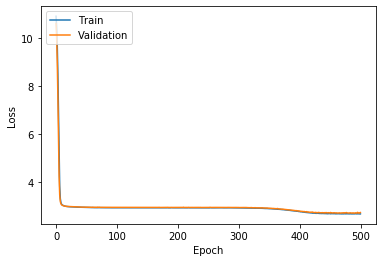

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
plt.savefig('./loss.pdf')

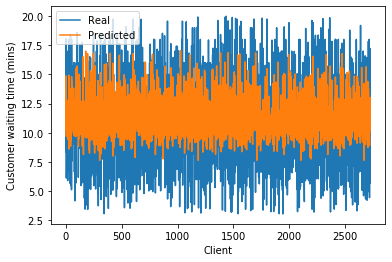

In [19]:
testy_pred = model.predict(testX_scaled)
myLength = len(testy_pred)
plt.plot(range(myLength), testy)
plt.plot(range(myLength), testy_pred)
plt.ylabel('Customer waiting time (mins)')
plt.xlabel('Client')
plt.legend(['Real', 'Predicted'], loc='upper left')
plt.savefig('./realVsPredictedWaitingTimes.pdf')

In [20]:
myMae = mean_absolute_error(testy, testy_pred)
print(f'The mean absolute error I get with the neural network is {myMae} minutes.')

The mean absolute error I get with the neural network is 2.6828083057243663 minutes.


In [21]:
myLength = len(testy_pred)
myFMean = np.mean(trainy)
myFMedian = np.median(trainy)
testyMean = testy_pred.copy()
testyMedian = testy_pred.copy()
for i in range(myLength):
    testyMean[i] = myFMean
    testyMedian[i] = myFMedian

In [22]:
myMaeNaiveMean = mean_absolute_error(testy, testyMean)
print(f'The mean absolute error I get with the naive mean model is {myMaeNaiveMean} minutes.')

The mean absolute error I get with the naive mean model is 2.943643774768819 minutes.


In [23]:
myMaeNaiveMedian = mean_absolute_error(testy, testyMedian)
print(f'The mean absolute error I get with the naive median model is {myMaeNaiveMedian} minutes.')

The mean absolute error I get with the naive median model is 2.9410409835583633 minutes.
